<a href="https://colab.research.google.com/github/xhxuciedu/CS284A/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def set_default(figsize=(8, 5), dpi=100):
    plt.style.use(["dark_background", "bmh"])
    plt.rc("axes", facecolor="k")
    plt.rc("figure", facecolor="k")
    plt.rc("figure", figsize=figsize, dpi=dpi)


set_default()

In [3]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array(
    [
        [3.3],
        [4.4],
        [5.5],
        [6.71],
        [6.93],
        [4.168],
        [9.779],
        [6.182],
        [7.59],
        [2.167],
        [7.042],
        [10.791],
        [5.313],
        [7.997],
        [3.1],
    ],
    dtype=np.float32,
)

y_train = np.array(
    [
        [1.7],
        [2.76],
        [2.09],
        [3.19],
        [1.694],
        [1.573],
        [3.366],
        [2.596],
        [2.53],
        [1.221],
        [2.827],
        [3.465],
        [1.65],
        [2.904],
        [1.3],
    ],
    dtype=np.float32,
)

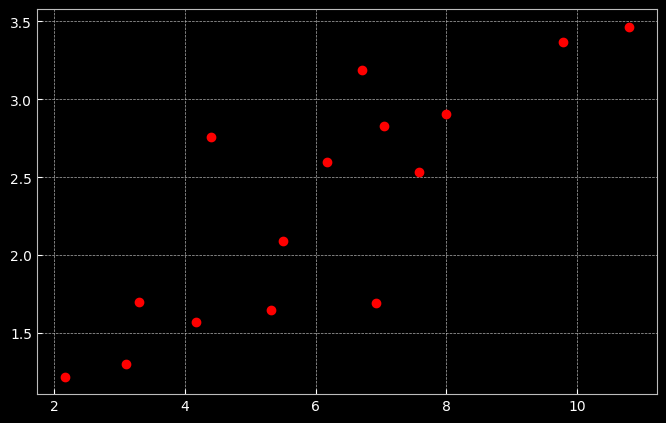

In [4]:
# plot the training data
plt.plot(x_train, y_train, "ro", label="Original data")

In [5]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
# check the parameters of the linear model
list(model.parameters())

[Parameter containing:
 tensor([[0.7750]], requires_grad=True),
 Parameter containing:
 tensor([0.8015], requires_grad=True)]

In [7]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch + 1, num_epochs, loss.item()))

# Save the model checkpoint
torch.save(model.state_dict(), "model.ckpt")

Epoch [5/60], Loss: 5.7826
Epoch [10/60], Loss: 2.4431
Epoch [15/60], Loss: 1.0903
Epoch [20/60], Loss: 0.5422
Epoch [25/60], Loss: 0.3202
Epoch [30/60], Loss: 0.2302
Epoch [35/60], Loss: 0.1938
Epoch [40/60], Loss: 0.1790
Epoch [45/60], Loss: 0.1730
Epoch [50/60], Loss: 0.1706
Epoch [55/60], Loss: 0.1696
Epoch [60/60], Loss: 0.1692


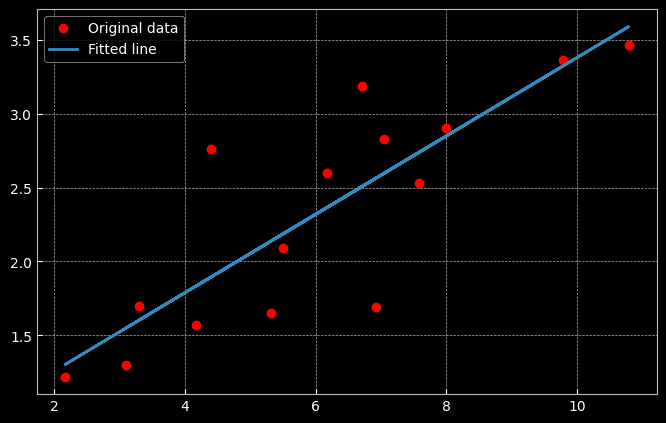

In [8]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, "ro", label="Original data")
plt.plot(x_train, predicted, label="Fitted line")
plt.legend()
plt.show()